# <center>Answering Popular Data Science Questions With SQL</center>

<div>
<img src="Data/se-logo.png" width="400"/>
</div>


In this project we are wanting to investigate popular questions that Data Scientists have, based on the submissions on __Stack Exchange__'s Data Science subsection. The results will guide the production of a new book on popular data science topics.__Stack Exchange__ is a specialised question and answer forum for technical subjects and employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.


# Exploring Stack Exchange Data Science posts with the Data Explorer.

To get a feel for what questions are asked in the Data Science subsection of __Stack Exchange__, we utilised the websites Data Explorer. This tool provides us with all the data pertaining to different elements of the posts, without having to perform a web-scapre to obtain the data.

The Data Explorer allows us to make SQL requests for the data that we are interested in.

For instance - this query returns the top posts based on the score of each post:

<div>
<img src="Data/SQL_top_post_query.PNG" width="600"/>
</div>

<div>
<img src="Data/SQL_return_top_scoring_posts.PNG" width="800"/>
</div>

Running the same inquiry, but for tags shows us what are the most popular topics withing the Data Science subsection:
<div>
<img src="Data/SQL_top_tag_query.PNG" width="600"/>
</div>

<div>
<img src="Data/SQL_return_top_tags.PNG" width="600"/>
</div>

## Observations

There are particular data sets which look like they will be more useful than others.

__Posts__ appears to be particularly useufl, as it contains information about the popularity and response rate to each post, in the form of <mark>Score</mark>, <mark>AnswerCount</mark>, <mark>ViewCount</mark> and <mark>FavoriteCount</mark>. This data set also contains the <mark>Tags</mark>, which will allow us to connect with the __Tags__ data set, which will enable us to determine the most popular topics and the feedback they receive.

Moving forward, we are going to focus on these aspects of the __Posts__ data set:

- <mark>Id</mark>: An identification number for the post.
- <mark>PostTypeId</mark>: An identification number for the type of post.
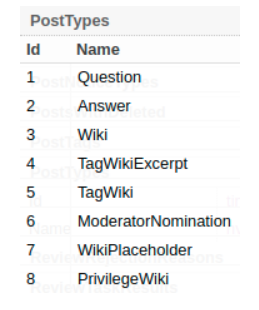
- <mark>CreationDate</mark>: The date and time of creation of the post.
- <mark>Score</mark>: The post's score.
- <mark>ViewCount</mark>: How many times the post was viewed.
- <mark>Tags</mark>: What tags were used.
- <mark>AnswerCount</mark>: How many answers the question got (only applicable to question posts).
- <mark>FavoriteCount</mark>: How many times the question was favored (only applicable to question posts).

First, we are going to count the number of types of post:

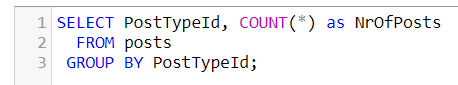

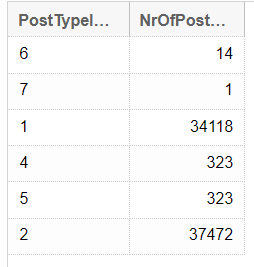

Correlating these PostTypeIds with the table above, we can see that the most popular post type is an _Answer_ (37,472) followed by a _Question_ (34,118). All other types of post are negligible compared to Questions and Answers.


## Querying Stack Exchange for our working data set.

To limit the scope of our investigation, we are only going to focus on Questions from the previous year (2021). The following query returns the relevant data:
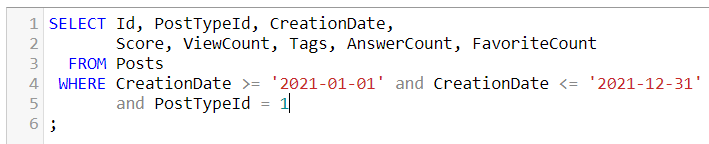

We download the data set as a _.csv_ file for reading into this __Jupyter Notebook__. We now need to import the required libraries and read in the csv file to a database:

In [1]:
# Importing useful packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the relevant data set for this project.
SEDS_DB = pd.read_csv('./Data/QueryResults.csv')

In [3]:
# Looking at the database we have just created.
display(SEDS_DB.head())
display("This data set of questions contains " + str(SEDS_DB.size) + " rows of data")
display("The data set has the following column formats:", SEDS_DB.dtypes)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,87391,1,2021-01-01 03:10:42,1,44,<decision-trees>,1,NaN
1,87392,1,2021-01-01 07:28:07,0,86,<machine-learning><python><deep-learning><imag...,1,NaN
2,87393,1,2021-01-01 08:07:33,1,22,<neural-network><deep-learning><inception>,0,NaN
3,87395,1,2021-01-01 10:31:51,1,54,<machine-learning><cloud><federated-learning>,1,1.0
4,87404,1,2021-01-01 18:00:21,1,93,<reinforcement-learning><openai-gym>,1,NaN


'This data set of questions contains 43352 rows of data'

'The data set has the following column formats:'

Id                 int64
PostTypeId         int64
CreationDate      object
Score              int64
ViewCount          int64
Tags              object
AnswerCount        int64
FavoriteCount    float64
dtype: object

## Data Cleaning

Straight away, we can see that the <mark>FavoriteCount</mark> is full of NaN values, which likely means it should be zero instead. The <mark>FaoriteCount</mark> is stored as a _float_ when it should be an _integer_. Also, the <mark>CreationDate</mark> is stored as an _object_ (string) and not as a _DateTime_.

In [4]:
# Filling in the NaN values with 0.0
SEDS_DB['FavoriteCount'].fillna(0,inplace=True)
SEDS_DB['FavoriteCount'] = SEDS_DB['FavoriteCount'].astype(int)

# Converting CreationDate to DateTime format.
SEDS_DB['CreationDate'] = SEDS_DB['CreationDate'].astype("datetime64[ns]")

display("The columns now have the correct formats:", SEDS_DB.dtypes)

'The columns now have the correct formats:'

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

We can see that the tags are separated my angled parentheses (< and >). We are going to clean this so that the are comma separated instead, making the data easier to read and manipulate.

In [5]:
# Using string replace to change these parentheses.
SEDS_DB['Tags'] = SEDS_DB['Tags'].str.replace("><",",").str.replace(">","").str.replace("<","")

# Inspecting our update
SEDS_DB.head(10)

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,87391,1,2021-01-01 03:10:42,1,44,decision-trees,1,0
1,87392,1,2021-01-01 07:28:07,0,86,"machine-learning,python,deep-learning,image-cl...",1,0
2,87393,1,2021-01-01 08:07:33,1,22,"neural-network,deep-learning,inception",0,0
3,87395,1,2021-01-01 10:31:51,1,54,"machine-learning,cloud,federated-learning",1,1
4,87404,1,2021-01-01 18:00:21,1,93,"reinforcement-learning,openai-gym",1,0
5,87405,1,2021-01-01 18:18:01,2,142,"optimization,categorical-data,mathematics,theo...",0,0
6,87413,1,2021-01-02 01:21:52,1,173,"neural-network,deep-learning,cnn,lstm,rnn",0,0
7,87414,1,2021-01-02 08:21:41,-1,47,"accuracy,metric,loss",1,1
8,87416,1,2021-01-02 10:57:58,1,30,"machine-learning,regression,cnn",0,0
9,87417,1,2021-01-02 11:06:52,1,71,"visualization,graphs,tableau,powerbi",1,0


## Analysing post tags.

Now that we have a cleaned data set, we want to investigate what tags are used most commonly and what the most viewed tags are. To do this, we are going to loop over the data set and count the number of times each tag is used, and sum the total views for each tag.

In [6]:
# Setting up empty dicitionarirs to count the mentions of a tag and its' associated views
tag_count = {}
tag_view_count = {}


# Iterating over every row in the database using the index to reference the rows
for ind in SEDS_DB.index:
    # Assigning tags to an object
    tags_unsorted = SEDS_DB['Tags'][ind]
    # Assigning views to an object
    views = SEDS_DB['ViewCount'][ind]
    # Splitting the tags into a list
    entry_tags = SEDS_DB['Tags'][ind].split(",")
    
    # Iterating over the tags for this entry
    for entry in entry_tags:
        # If the tag is not already in the dictionary - we add a key and put in the correct starting values
        if entry in tag_count:
            tag_count[entry] += 1
            tag_view_count[entry] += views
        # Otherwise we add the correct values to the existing key
        else:
            tag_count[entry] = 1
            tag_view_count[entry] = views

            
# Displaying the entirity of these dictionaries (unsorted)
print(tag_count)
print("     ")
print(tag_view_count)

{'decision-trees': 116, 'machine-learning': 1460, 'python': 1011, 'deep-learning': 787, 'image-classification': 122, 'image-preprocessing': 37, 'neural-network': 502, 'inception': 5, 'cloud': 5, 'federated-learning': 3, 'reinforcement-learning': 86, 'openai-gym': 8, 'optimization': 81, 'categorical-data': 53, 'mathematics': 41, 'theory': 16, 'parameter-estimation': 12, 'cnn': 229, 'lstm': 163, 'rnn': 73, 'accuracy': 69, 'metric': 35, 'loss': 16, 'regression': 204, 'visualization': 96, 'graphs': 34, 'tableau': 17, 'powerbi': 3, 'matplotlib': 41, 'text': 27, 'clustering': 178, 'xgboost': 88, 'data-science-model': 117, 'scikit-learn': 323, 'k-means': 57, 'python-3.x': 64, 'seaborn': 9, 'dataset': 228, 'hyperparameter-tuning': 56, 'k-nn': 45, 'predictive-modeling': 121, 'machine-learning-model': 169, 'supervised-learning': 54, 'keras': 410, 'tensorflow': 406, 'numpy': 64, 'random-forest': 117, 'classification': 452, 'data-analysis': 65, 'overfitting': 59, 'early-stopping': 6, 'ngboost': 1,

## Ordering dictionaries into Top 20 and plotting.

Now that we have created dictionaries which have counted the tags usage and views, we want to order each dictionary and select the top 20 tags for each categorisation.

In [7]:
# We now want to sort these dictionaries descending from largest values to smallest, and take the top 20 for plotting.

# First we create a new dictionary for the sorting of the tag count
sorted_dict = {}

# Sorting the dictionary keys by the top 20 
sorted_keys = sorted(tag_count, key=tag_count.get, reverse=True)[:20]  # [1, 3, 2]

# Outputting a new, sorted dictionary, with the top 20 entries.
for w in sorted_keys:
    sorted_dict[w] = tag_count[w]
    
tag_count_sorted = sorted_dict

display(tag_count_sorted)

# First we create a new dictionary for the sorting of the total tag views
sorted_dict = {}

# Sorting the dictionary keys by the top 20 
sorted_keys = sorted(tag_view_count, key=tag_view_count.get, reverse=True)[:20]  # [1, 3, 2]

# Outputting a new, sorted dictionary, with the top 20 entries.
for w in sorted_keys:
    sorted_dict[w] = tag_view_count[w]
    
tag_view_count_sorted = sorted_dict

display(tag_view_count_sorted)


{'machine-learning': 1460,
 'python': 1011,
 'deep-learning': 787,
 'neural-network': 502,
 'nlp': 476,
 'classification': 452,
 'keras': 410,
 'tensorflow': 406,
 'scikit-learn': 323,
 'time-series': 314,
 'cnn': 229,
 'dataset': 228,
 'regression': 204,
 'pandas': 203,
 'pytorch': 182,
 'clustering': 178,
 'machine-learning-model': 169,
 'statistics': 168,
 'lstm': 163,
 'convolutional-neural-network': 161}

{'python': 328756,
 'machine-learning': 220218,
 'deep-learning': 152349,
 'keras': 127969,
 'tensorflow': 125974,
 'pandas': 112326,
 'scikit-learn': 105519,
 'nlp': 84547,
 'neural-network': 74267,
 'cnn': 67424,
 'numpy': 62868,
 'classification': 57721,
 'transformer': 51132,
 'matplotlib': 50217,
 'convolutional-neural-network': 49632,
 'pytorch': 46653,
 'bert': 45664,
 'time-series': 42489,
 'dataset': 39462,
 'image-classification': 33866}

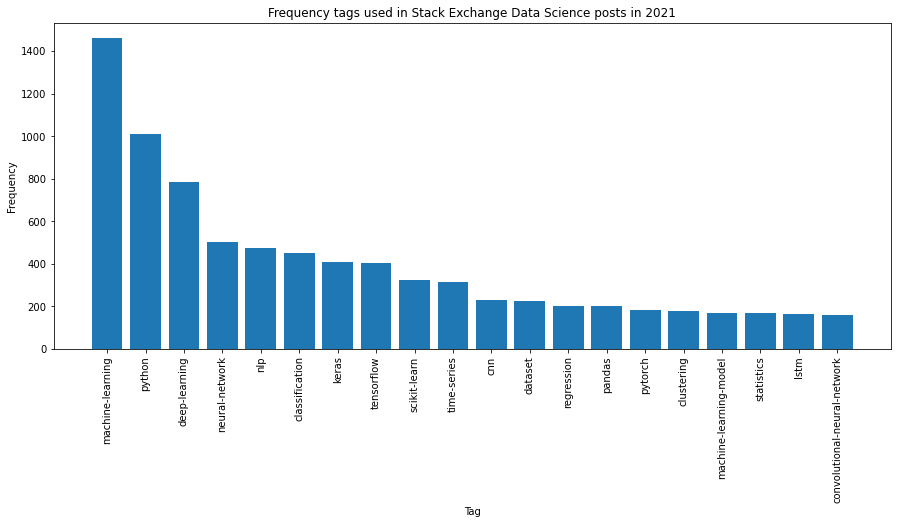

In [8]:
# Plotting the 20 most common tags and their use count
plt.figure(figsize=(15,6))
_ = plt.bar(range(len(tag_count_sorted)), list(tag_count_sorted.values()), align='center')
_ = plt.xticks(range(len(tag_count_sorted)), list(tag_count_sorted.keys()))
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Tag')
_ = plt.title('Frequency tags used in Stack Exchange Data Science posts in 2021')

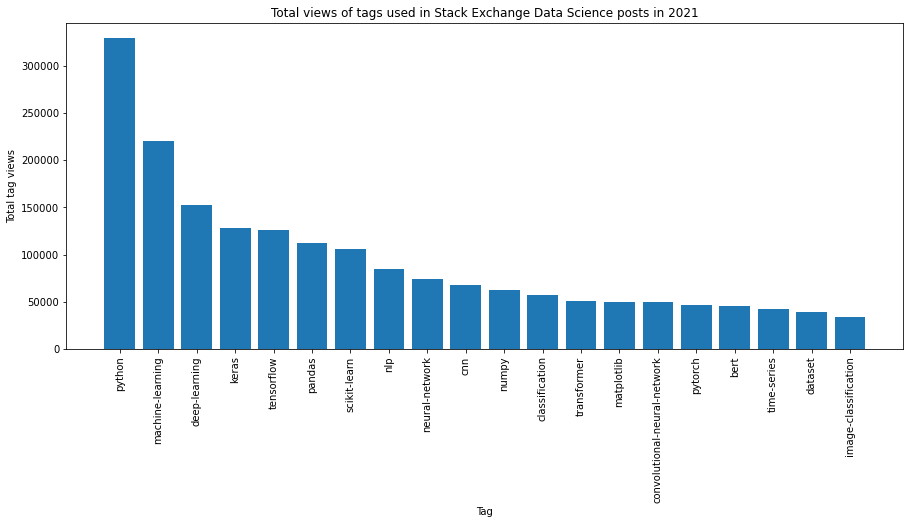

In [9]:
# Plotting the 20 most viewed tags and their total views
plt.figure(figsize=(15,6))
_ = plt.bar(range(len(tag_view_count_sorted)), list(tag_view_count_sorted.values()), align='center')
_ = plt.xticks(range(len(tag_view_count_sorted)), list(tag_view_count_sorted.keys()))
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Total tag views')
_ = plt.xlabel('Tag')
_ = plt.title('Total views of tags used in Stack Exchange Data Science posts in 2021')

## Observations

Many of the same tags appear in the most used tags and the most viewed, which makes sense. We can see that the machine-learning tag is the most used, but the python is the most viewed. 

We can cluster many of the Top 20 into categories:

__Machine Learning__:
- <mark>machine-learning</mark>
- <mark>tensorflow</mark>
- <mark>scikit-learn</mark>
- <mark>nlp</mark>
- <mark>neural-network</mark>
- <mark>cnn</mark>

__Deep Learning__:
- <mark>deep-learning</mark>
- <mark>keras</mark>
- <mark>nlp</mark>
- <mark>neural-network</mark>
- <mark>cnn</mark>

__Python__:
- <mark>python</mark>
- <mark>pandas</mark>
- <mark>scikit-learn</mark>
- <mark>numpy</mark>
- <mark>matlplotlib</mark>

From the top tags, we conclude that the most commonly asked questions relate to _machine learning_ and _deep learning_, which are typically applied using _python_ as the coding language.

## Is deep-learning just a fad?

Before we commit to the topics for our hypothetical book, we want to understand whether these topics are just a passing interest, or technologies that are likely to play and important role in the future of data science.

In this section we will track the interest in deep learning across time. We will:

- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

For this we are going to request a new data set of all questions asked, comprising each posts:
- <mark>Id</mark>
- <mark>CreationDate</mark>
- <mark>Tags</mark>

This request returns the required elements for the enitire time period the __Stack Exchange__ Data Science forum has been operational:

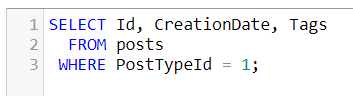

Next we need to read in the data, as we did for our earlier data set.

In [10]:
# Reading in the relevant data set for this project.
SEDS_DL = pd.read_csv('./Data/DeepLearningQueryResults.csv')

In [11]:
# Converting CreationDate to DateTime format.
SEDS_DL['CreationDate'] = SEDS_DL['CreationDate'].astype("datetime64[ns]")

display("The columns now have the correct formats:", SEDS_DB.dtypes)

'The columns now have the correct formats:'

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [12]:
# Using string replace to change these parentheses.
SEDS_DL['Tags'] = SEDS_DL['Tags'].str.replace("><",",").str.replace(">","").str.replace("<","")

# Inspecting our update
SEDS_DL.head(10)

,Id,CreationDate,Tags
0,28852,2018-03-09 05:44:51,"deep-learning,regression,convolutional-neural-..."
1,28858,2018-03-09 07:55:29,"reinforcement-learning,openai-gym"
2,28865,2018-03-09 10:49:50,"machine-learning,predictive-modeling,statistic..."
3,28868,2018-03-09 12:13:45,"python,json"
4,28870,2018-03-09 13:50:23,"machine-learning,clustering"
5,28871,2018-03-09 13:58:32,"keras,image-classification,cnn"
6,28874,2018-03-09 15:36:05,"machine-learning,neural-network,deep-learning,..."
7,28875,2018-03-09 15:48:01,"machine-learning,deep-learning,neural-network,..."
8,28877,2018-03-09 15:56:37,"machine-learning,neural-network"
9,28880,2018-03-09 16:31:13,"keras,rnn,cnn,autoencoder"


## Dividing data into months

As we want to see the trend in <mark>deep-learning</mark> over time, it makes sense to look at these trends by binning the total questions and <mark>deep-learning</mark> questions by month, as analysing day-by-day may result in variance which may obstruct longer term trends.

The first thing we will do is create a column with a string representing the year and month:

In [13]:
# Creating a column that represents the Year and Month each question is asked.
SEDS_DL['YearMonth'] = ((pd.DatetimeIndex(SEDS_DL['CreationDate']).year*100) + (pd.DatetimeIndex(SEDS_DL['CreationDate']).month)).astype(str)

We can look at how many questions are asked in each month by group by the _YearMonth_ and using the <mark>count()</mark> function:

In [14]:
# Calculating the total questions asked each month.
SEDS_DL.groupby('YearMonth').count()

,Id,CreationDate,Tags
YearMonth,,,
201405,58,58,58
201406,99,99,99
201407,76,76,76
201408,64,64,64
201409,48,48,48
...,...,...,...
202204,554,554,554
202205,520,520,520
202206,434,434,434


In [15]:
# Inspecting the updated database (no grouping) before we calculate the total questions and deep learning questions each month
SEDS_DL.head()

,Id,CreationDate,Tags,YearMonth
0,28852,2018-03-09 05:44:51,"deep-learning,regression,convolutional-neural-...",201803
1,28858,2018-03-09 07:55:29,"reinforcement-learning,openai-gym",201803
2,28865,2018-03-09 10:49:50,"machine-learning,predictive-modeling,statistic...",201803
3,28868,2018-03-09 12:13:45,"python,json",201803
4,28870,2018-03-09 13:50:23,"machine-learning,clustering",201803


## Calculating total questions and deep-learning related questions.

Now that we have a way of group each question by month, we want to count how many <mark>deep-learning</mark> questions there are each month, and what proportion of the total questions they make up.

We are going to define a <mark>deep-learning</mark> question as any post that contains the following tags:
- <mark>deep-learning</mark>
- <mark>keras</mark>
- <mark>nlp</mark>
- <mark>neural-network</mark>
- <mark>cnn</mark>

We are going to us a similar peice of code to the first section, to determine whether a post is a <mark>deep-learning</mark> question or not. We will initially put our results into a dictionary which will have a binary <mark>1</mark> if a post is related to </mark>deep-learning</mark> or a <mark>0</mark> if unrelated.

In [16]:
# Setting and empty dictionary to populate
DL = {}

# Iterating over every row in the database using the index to reference the rows
for ind in SEDS_DL.index:
    # Assigning tags to an object
    tags_unsorted = SEDS_DL['Tags'][ind]
    # Splitting the tags into a list
    entry_tags = SEDS_DL['Tags'][ind].split(",")
    #Boolean logic to figure out whether the post contains a deep-learning tag or not.
    if "deep-learning" in entry_tags:
        DL[ind] = 1
    elif "keras" in entry_tags:
        DL[ind] = 1
    elif "nlp" in entry_tags:
        DL[ind] = 1
    elif "neural-network" in entry_tags:
        DL[ind] = 1  
    elif "cnn" in entry_tags:
        DL[ind] = 1  
    else:
        DL[ind] = 0
    

The result is a dictionary with keys that match the indexing of the original data set, and values indicating whether the corresponding post is related to <mark>deep-learning</mark> or not.

In [17]:
# Looking at out results
print(list(DL.items())[:20])

[(0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 0), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 0), (18, 0), (19, 0)]


Converting this dictionary to a dataframe, for merging with our original dataframe:

In [18]:
# Converting dictionary to dataframe
DQL = pd.DataFrame.from_dict(DL, orient='index')
DQL = DQL.rename(columns={0: "DL Count"})
DQL.head(10)

,DL Count
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


Next we join the <mark>deep-learning</mark> count with the dataframe containing all information on the posts.

In [19]:
# Joining the two dataframes.
SEDS_DL_for_counting = SEDS_DL.join(DQL)
SEDS_DL_for_counting.head()

,Id,CreationDate,Tags,YearMonth,DL Count
0,28852,2018-03-09 05:44:51,"deep-learning,regression,convolutional-neural-...",201803,1
1,28858,2018-03-09 07:55:29,"reinforcement-learning,openai-gym",201803,0
2,28865,2018-03-09 10:49:50,"machine-learning,predictive-modeling,statistic...",201803,0
3,28868,2018-03-09 12:13:45,"python,json",201803,0
4,28870,2018-03-09 13:50:23,"machine-learning,clustering",201803,0


## Calculating total proportion of deep-learning questions.

Now that we have a dataset of information on all the posts, with indicators of whether each question is <mark>deep-learning</mark> or not, we can sum all the questions up now.

In [20]:
# Grouping the posts by month and year.
group_by_month = SEDS_DL_for_counting.groupby('YearMonth')

In [21]:
# Assigning a blank DF for the counting of posts
DLQ_count = []
DLQ_count_df = pd.DataFrame(DLQ_count)

# Summing the deep-learning posts in each month
DLQ_count_df['DL Q Count'] = group_by_month["DL Count"].sum()

# Summing the total posts in each month
DLQ_count_df['Total Q Count'] = SEDS_DL_for_counting.groupby('YearMonth').count()['Id']

# Calculating the proportion of deep-learning to all posts
DLQ_count_df['DL Proportion'] = (DLQ_count_df['DL Q Count'] / DLQ_count_df['Total Q Count']) * 100 

DLQ_count_df.head(10)

,DL Q Count,Total Q Count,DL Proportion
YearMonth,,,
201405,4,58,6.896552
201406,12,99,12.121212
201407,12,76,15.789474
201408,6,64,9.375000
201409,4,48,8.333333
201410,10,69,14.492754
201411,8,64,12.500000
201412,10,81,12.345679
201501,5,63,7.936508


In [22]:
# Converting YearMonth from index to individual date column
DLQ_count_df['YM'] = DLQ_count_df.index
DLQ_count_df['Year'] = (DLQ_count_df['YM'].astype(int) / 100).astype(int)
DLQ_count_df['Month'] = (DLQ_count_df['YM']).astype(int) - (DLQ_count_df['Year'] * 100)
DLQ_count_df['Hyphenated Date'] = (DLQ_count_df['Year']).astype(str) + "-" + (DLQ_count_df['Month']).astype(str)
DLQ_count_df.head(10)
DLQ_count_df['Date'] = pd.to_datetime(DLQ_count_df['Hyphenated Date'])
DLQ_count_df = DLQ_count_df.drop(['YM', 'Year', 'Month','Hyphenated Date'], axis=1)

DLQ_count_df.head()

,DL Q Count,Total Q Count,DL Proportion,Date
YearMonth,,,,
201405,4,58,6.896552,2014-05-01
201406,12,99,12.121212,2014-06-01
201407,12,76,15.789474,2014-07-01
201408,6,64,9.375000,2014-08-01
201409,4,48,8.333333,2014-09-01


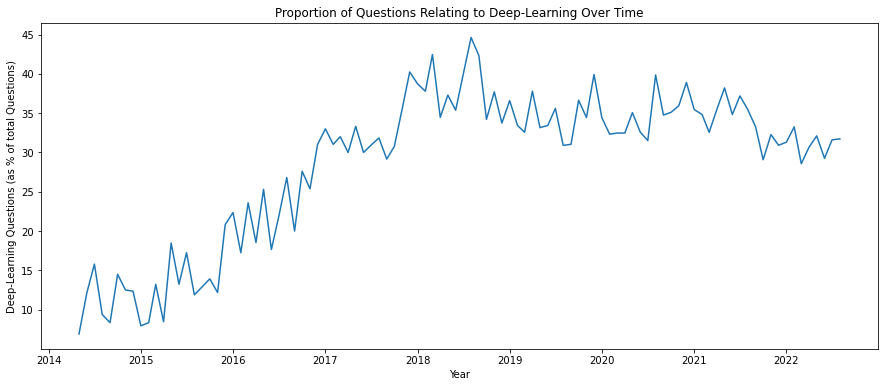

In [23]:
plt.figure(figsize=(15,6))
plt.plot(DLQ_count_df['Date'], DLQ_count_df['DL Proportion'])
plt.title('Proportion of Questions Relating to Deep-Learning Over Time')
plt.xlabel('Year')
plt.ylabel('Deep-Learning Questions (as % of total Questions)')
plt.show()

## Observations and Conclusions.

Questions relating to <mark>deep-learning</mark> steadily increased from ~10% in 2014, to a peak of ~45% in 2018. While there are monthly variations, questions relating <mark>deep-learning</mark> consistently compromise 30-40% of all questions asked on __Stack Exhange__'s Data Science subsection.

Given the popularity of <mark>deep-learning</mark> questions on the website, we would recommend moving forward with a book aimed at informing people on this topic.